# R Code

## 1. Glimpse of Dataset

In [9]:
library(dplyr)
library(ggplot2)
trout2015<-read.csv("trout2015.csv")
glimpse(trout2015)
attach(trout2015)


Observations: 385
Variables: 8
$ X             <int> 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16...
$ Game.Date     <fctr> 10/3/15, 10/3/15, 10/3/15, 10/3/15, 10/2/15, 10/2/15...
$ Pitcher       <fctr> Jake Diekman, Colby Lewis, Ross Ohlendorf, Chi Chi G...
$ Batter        <fctr> Mike Trout, Mike Trout, Mike Trout, Mike Trout, Mike...
$ Exit_Velocity <dbl> 107.2, 89.8, 61.9, 109.7, 98.5, 103.2, 87.4, 77.6, 10...
$ Launch_Angle  <dbl> 7.58, 28.60, -0.29, 15.60, 26.73, 21.59, 42.40, -16.0...
$ Distance      <int> 290, 333, 118, 311, 331, 385, 299, 136, 432, 179, 301...
$ Event         <fctr> Single, Double, Groundout, Sac Fly, Lineout, Triple,...


## 2. Recode Event as Hit or Out

In [13]:
trout2015$Event<-as.character(trout2015$Event)
trout2015$Event[trout2015$Event=="Single"]<-"Hit"   
trout2015$Event[trout2015$Event=="Double"]<-"Hit"
trout2015$Event[trout2015$Event=="Triple"]<-"Hit"
trout2015$Event[trout2015$Event=="Home Run"]<-"Hit"
               
trout2015$Event[trout2015$Event=="Groundout"]<-"Out"
               
trout2015$Event[trout2015$Event=="Sac Fly"]<-"Out"
               
trout2015$Event[trout2015$Event=="Lineout"]<-"Out" 
               
trout2015$Event[trout2015$Event=="Flyout"]<-"Out"
               
trout2015$Event[trout2015$Event=="Pop Out"]<-"Out"
            
trout2015$Event[trout2015$Event=="Grounded Into DP"]<-"Out"
               
trout2015$Event[trout2015$Event=="Field Error"]<-"Out"
               
trout2015$Event[trout2015$Event=="Forceout"]<-"Out"

               
trout2015$Event[trout2015$Event=="Double Play"]<-"Out"
                
trout2015$Event<-as.factor(trout2015$Event)

## 3. Scatterplot of Launch Angle and Velocity 

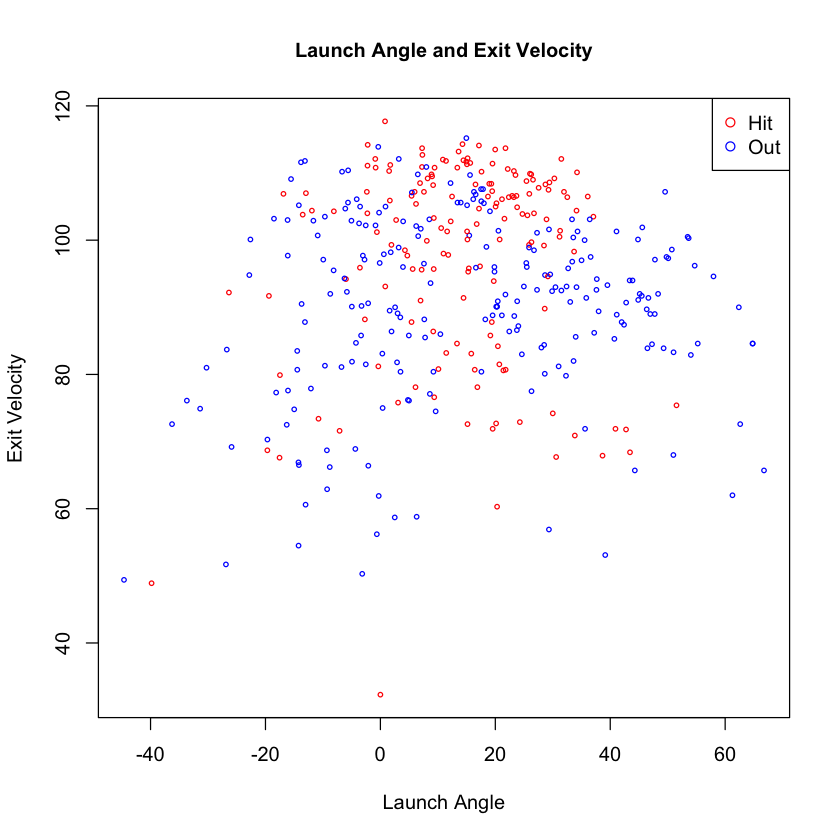

In [25]:
LaunchAngle_lims=range(Launch_Angle)
plot(Launch_Angle,Exit_Velocity,xlim=LaunchAngle_lims ,cex=.5,col=c("red","blue")[(as.numeric(trout2015$Event))],
      xlab="Launch Angle",ylab="Exit Velocity")
title(main="Launch Angle and Exit Velocity", cex.main=1)
legend(x="topright", legend = levels(trout2015$Event), col=c("red","blue"), pch=1)

## 4. Hypothesis Test & Selecting the Model
* Note: We can decide on the degree of the polynomial to use for the data by using hypothesis tests.

In [14]:
fit.1=lm(Exit_Velocity~Launch_Angle,data=trout2015)
fit.2=lm(Exit_Velocity~poly(Launch_Angle,2),data=trout2015)
fit.3=lm(Exit_Velocity~poly(Launch_Angle,3),data=trout2015)
fit.4=lm(Exit_Velocity~poly(Launch_Angle,4),data=trout2015)
fit.5=lm(Exit_Velocity~poly(Launch_Angle,5),data=trout2015)
fit.6=lm(Exit_Velocity~poly(Launch_Angle,6),data=trout2015)
fit.7=lm(Exit_Velocity~poly(Launch_Angle,7),data=trout2015)
fit.8=lm(Exit_Velocity~poly(Launch_Angle,8),data=trout2015)
fit.9=lm(Exit_Velocity~poly(Launch_Angle,9),data=trout2015)
fit.10=lm(Exit_Velocity~poly(Launch_Angle,10),data=trout2015)
anova(fit.1,fit.2,fit.3,fit.4,fit.5,fit.6,fit.7,fit.8,fit.9,fit.10)

Res.Df,RSS,Df,Sum of Sq,F,Pr(>F)
383,82686.47,NA,NA,NA,NA
382,70762.24,1,11924.22435,64.19309194,1.449942e-14
381,70583.98,1,178.26850,0.95969396,3.278973e-01
380,70566.16,1,17.81221,0.09589059,7.569904e-01
379,70513.33,1,52.83689,0.28444309,5.941205e-01
378,69851.64,1,661.68613,3.56213347,5.988582e-02
377,69539.65,1,311.98728,1.67955813,1.957824e-01
376,69517.16,1,22.48861,0.12106561,7.280774e-01
375,69498.33,1,18.83801,0.10141291,7.503184e-01
374,69472.58,1,25.74343,0.13858769,7.099000e-01


We fit ten different models and compare the simpler model to the complex model. The degree-6 polynomial appears to provide a reasonable fit to the data. 

## 5. Fitting the Model

In [15]:
fit=lm(Exit_Velocity~poly(Launch_Angle,6),data=trout2015)
coef(summary(fit))

,Estimate,Std. Error,t value,Pr(>|t|)
(Intercept),93.244156,0.6928066,134.5890048,2.005907e-321
"poly(Launch_Angle, 6)1",24.743503,13.5938478,1.8201986,6.951945e-02
"poly(Launch_Angle, 6)2",-109.198097,13.5938478,-8.0329056,1.223982e-14
"poly(Launch_Angle, 6)3",13.351723,13.5938478,0.9821886,3.266352e-01
"poly(Launch_Angle, 6)4",4.220451,13.5938478,0.3104678,7.563764e-01
"poly(Launch_Angle, 6)5",7.268899,13.5938478,0.5347197,5.931581e-01
"poly(Launch_Angle, 6)6",-25.723261,13.5938478,-1.8922722,5.921864e-02


Degree-6 Polynomial, where x = Launch Angle

Exit Velocity = 93.244156+ 24.743503x - 109.198097(x^2) + 13.351723(x^3)+ 
4.220451(x^4) + 7.268899(x^5)-25.723261(x^6)

## 6. Plotting the Data & Adding the Fit

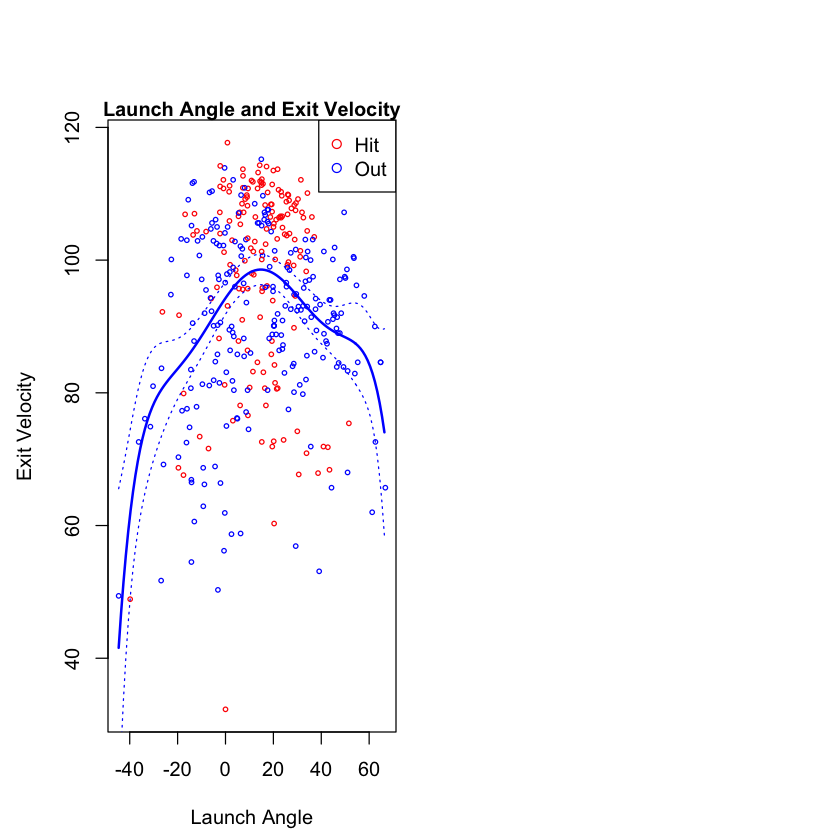

In [24]:
LaunchAngle.grid=seq(from=LaunchAngle_lims[1],to= LaunchAngle_lims[2])
preds=predict(fit,newdata=list(Launch_Angle=LaunchAngle.grid),se=TRUE)
se.bands=cbind(preds$fit+2*preds$se.fit,preds$fit-2*preds$se.fit)
par(mfrow=c(1,2),mar=c(4.5,4.5,1,1) ,oma=c(0,0,4,0))



plot(Launch_Angle,Exit_Velocity,xlim=LaunchAngle_lims ,cex=.5,col=c("red","blue")[(as.numeric(trout2015$Event))],
      xlab="Launch Angle",ylab="Exit Velocity")
title(main= "Launch Angle and Exit Velocity",cex.main=1)
lines(LaunchAngle.grid,preds$fit,lwd=2,col="blue")
matlines(LaunchAngle.grid,se.bands,lwd=1,col="blue",lty=3)
legend(x="topright", legend = levels(trout2015$Event), col=c("red","blue"), pch=1)
